# Know your customers

One of the most common applications of KMeans is to do customer segmentation. Take a very simple dataset to try to create clusters of customers.

0. Import usuals librairies

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import keras
#import sklearn
#import torch
#import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [5]:
df = pd.read_csv('Mall_Customers.csv')

1. Import the ```Mall_Customers.csv``` dataset

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Remove the "CustomerID" variable from your dataset. 

In [7]:
df = df.drop('CustomerID', axis=1)
print(df.shape)
df.head()

(200, 4)


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


3. Dummy your categorical variables 

In [9]:
df = pd.get_dummies(df, columns=['Genre'], drop_first=True )

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Genre_Male              200 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 5.0 KB


In [11]:
numeric_features = df.select_dtypes(include=[np.number]).columns
print(f'numerical features: {len(numeric_features)}')
#print(numeric_features)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())])

categorical_features = df.select_dtypes(include=['object']).columns
print(f'categorical features: {len(categorical_features)}')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat',OneHotEncoder(drop='first'), categorical_features) # Not needed
    ],
    remainder = 'drop')

regressors = [
    LinearRegression(),
    Ridge(alpha=10),
    Ridge(alpha=10000),
    ]

numerical features: 4
categorical features: 0


In [12]:
nparr_transf = preprocessor.fit_transform(df)
print(nparr_transf[0:5])
df_trans = pd.DataFrame(nparr_transf, columns=[*numeric_features, *categorical_features])
df_trans.describe()

[[-1.42456879 -1.73899919 -0.43480148  1.12815215]
 [-1.28103541 -1.73899919  1.19570407  1.12815215]
 [-1.3528021  -1.70082976 -1.71591298 -0.88640526]
 [-1.13750203 -1.70082976  1.04041783 -0.88640526]
 [-0.56336851 -1.66266033 -0.39597992 -0.88640526]]


,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16,3.108624e-17
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,-8.864053e-01
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,-8.864053e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,-8.864053e-01
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.128152e+00
max,2.235532e+00,2.917671e+00,1.894492e+00,1.128152e+00


4. We are going to build our clusters, but to do so, we need to know the optimum number of clusters we need. First use the ```Elbow``` method to see if we can see how many we need to take as a value for ```k```.

In [13]:
import plotly.graph_objects as go
import plotly.express as px


In [14]:
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 308862.06000000006
WCSS for K=2 --> 212889.44245524294
WCSS for K=3 --> 143391.59236035674
WCSS for K=4 --> 104414.67534220174
WCSS for K=5 --> 75399.61541401486
WCSS for K=6 --> 58348.64136331504
WCSS for K=7 --> 51132.70321257687
WCSS for K=8 --> 47641.452539276586
WCSS for K=9 --> 40857.18667502088
WCSS for K=10 --> 37649.905433455446


In [ ]:
sns.set_palette(sns.color_palette("deep"))
sns.lineplot(x=k, y=wcss)
sns.scatterplot(x=k, y=wcss)

PES: It seems k=4 is the good number


5. Then use the _Silhouette_ method to see if we can refine our hypothesis for ```k```.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Computer mean silhouette score
sil = []
k = []
## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,12): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(df)
    sil.append(silhouette_score(df, kmeans.predict(df)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

<AxesSubplot:ylabel='0'>

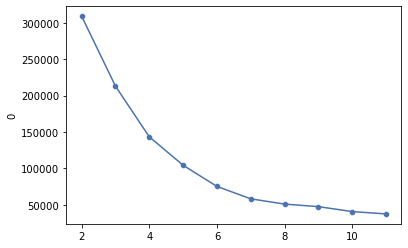

In [18]:
#sns.set_palette(sns.color_palette("deep"))
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

sns.lineplot(x=k_frame, y=wcss_frame.iloc[:,-1])
sns.scatterplot(x=k_frame, y=wcss_frame.iloc[:,-1])

In [21]:

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show() # if using workspace

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
!jupyter lab build

6. Next, we will take $K=5$ clusters. Apply the KMeans to your dataset.

In [30]:
kmeans = KMeans(n_clusters= 5, init = "k-means++", random_state = 0)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

In [34]:
df_labels = kmeans.predict(df)
df['labels'] = df_labels
df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,labels
0,19,15,39,1,0
1,21,15,81,1,4
2,20,16,6,0,0
3,23,16,77,0,4
4,31,17,40,0,0
...,...,...,...,...,...
195,35,120,79,0,2
196,45,126,28,0,3
197,32,126,74,1,2
198,32,137,18,1,3


In [39]:
print(kmeans.cluster_centers_)
kmeans.cluster_centers_[:,1]
kmeans.cluster_centers_[:,2]

[[45.2173913  26.30434783 20.91304348  0.39130435]
 [43.08860759 55.29113924 49.56962025  0.41772152]
 [32.69230769 86.53846154 82.12820513  0.46153846]
 [40.66666667 87.75       17.58333333  0.52777778]
 [25.52173913 26.30434783 78.56521739  0.39130435]]


array([20.91304348, 49.56962025, 82.12820513, 17.58333333, 78.56521739])

7. Let's create a graph that will allow us to visualize each of the clusters as well as their centroids. We will first take the ```Spending Score``` as the ordinate and the ```Annual Income``` as the abscissa. 

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

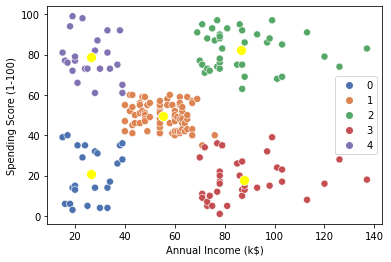

In [61]:
sns.set_palette(sns.color_palette())
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='labels', s=50, palette="deep")
sns.scatterplot(x=kmeans.cluster_centers_[:,1], y=kmeans.cluster_centers_[:,2], c=['yellow'], s=100)

8. We have a nice visualization with a nice cluster separation. Look this time at the variable ```Age``` in relation to the ```Spending Score```. What do you notice?

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

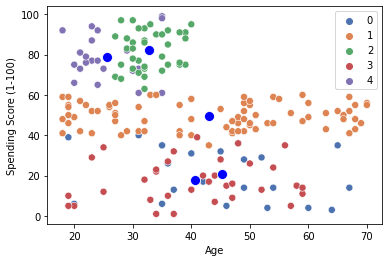

In [62]:
sns.set_palette(sns.color_palette())
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='labels', s=50, palette="deep")
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,2], c=['blue'], s=100)